## Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Import Package](#import-package)
* [3. Custom Functions](#custom-functions)
* [4. Get Data](#data-extraction)
* [5. Data Exploration and Data Transformation](#data-transformation)
* [6. Machine Learning Model-LOSGISTIC](#ml-model-Logistic)
* [7.  Machine Learning Model-KNN](#ml-model-KNN)
* [8. Performance Metrices and Choosing a Model](#Choosing-Model)

## 1. Problem Background and Motivation <a class="anchor" id="problem-background">
<br>
    <img src="https://miro.medium.com/max/1400/1*-oeA62qGj3jrpU9u2RrCrg.jpeg" width=100%>
<br>
    
   >- What is the problem?<br>
    Bank(s) wants to automate the loan eligibility process based on customer detail provided while filling online application form. These details are Gender, Marital Status, Income, Credit History and others. 
  
   >- Why is it important?<br>
    The primary need in the current world is LOANS. Banks only receive a large portion of the overall earnings from this. It is advantageous for people to purchase any type of luxury, such as homes, vehicles, etc., as well as for students to manage their educational and living expenditure.However, the decision as to whether the applicant's profile is pertinent for loan approval or not. Banks have a lot of responsibilities.
   
    
   >- Who are the key stakeholders? <br>


## 2. Import Package <a class="anchor" id="import-package"></a>
<br>


#### Pandas:<br>
We alias this as 'pd' and use it to ease the use pandas functions by simply typing pd.Function_Name.

#### SKLearn:<br>
The premier ML library. Here we are using it for predictive data analytics.
The train_test_split function of the sklearn.model_selection package in Python splits arrays or matrices into random subsets for train and test data, respectively.

#### Matplotlib.pyplot:<br>
matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

#### Seaborn:<br>
Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.


* [Go to Top](#table-of-content)

In [74]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics

## 3. Custom functions <a class="anchor" id="custom-functions">
</a><br>

* [Go to Top](#table-of-content)

In [75]:
# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

## 4. Get Data <a class="anchor" id="data-extraction"></a>
<br>
Initial Evaluation:<br>
<br>
- Target Variable- "status_delayed"(1 if Completed 0 Otherwise)<br>
- Total Number of Records- 690 <br>
- Number of columns: 27
<br>

  | Column Name    |     Column Definition             |
  |--------------	 |-------------------------------	|
  | approved  | Loan Status            |
  | Emp_      | Employer details of the borrower - industrial, materials,consumer services, healthcare, financials, utilities, education  |
  | ethinicity     |  white, black, latino, asian and others|
  | employed     | Employement status |
  | credit_score       | credit history |
  | drivers_licences   | if the borrower has a driver's license or not |
  | Citizen | Citizen status- by_birth, other, temporary|
  | Income | Income of the borrower|
  | Married | Marital status |
  | Gender | Gender status of borrower |
  | age | Age of the borrower |
  | Debt | Prior debt  |
  | bank_customer | if the borrower is the customer of the bank of not |
  | years_employed | years of employment |
  



* [Go to Top](#table-of-content)

In [76]:
# Read the Dataset.
df = pd.read_csv('loan_approval.csv')
print('Number of records:', len(df))
df.columns
#df.tail()

Number of records: 690


Index(['approved', 'gender', 'age', 'debt', 'married', 'bank_customer',
       'emp_industrial', 'emp_materials', 'emp_consumer_services',
       'emp_healthcare', 'emp_financials', 'emp_utilities', 'emp_education',
       'ethnicity_white', 'ethnicity_black', 'ethnicity_latino',
       'ethnicity_asian', 'ethnicity_other', 'years_employed', 'prior_default',
       'employed', 'credit_score', 'drivers_license', 'citizen_bybirth',
       'citizen_other', 'citizen_temporary', 'Income'],
      dtype='object')

## 5. Data Exploration and Data Transformation <a class="anchor" id="data-transformation"></a>

1. [Initial Cleanup - dupes, missing values](#initial-cleanup)
2. [Outlier Detection & Treatment](#outlier-detection)
3. [Feature Selection](#feature-selection)
4. [Data Partitioning](#data-split)

* [Go to Top](#table-of-content)

### 5.1 Initial Cleanup <a class="anchor" id="initial-cleanup"></a>
Remove Duplicates and missing values

> **Initial Cleanup: Summary of Actions**<br><br>
No missing values or dupes

In [77]:
#df.info()
#sns.boxplot(df.debt) 
#sns.histplot(df.Income) 

### 5.2 Outlier Detection & Treatment <a class="anchor" id="outlier-detection"></a>

* [Go to Data Exploration/Transformation](#data-transformation)
* [Go to Top](#table-of-content)

In [78]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
approved,690.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
gender,690.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
age,690.00,31.51,11.86,13.75,22.67,28.46,37.71,80.25
debt,690.00,4.76,4.98,0.00,1.00,2.75,7.21,28.00
married,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
bank_customer,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
emp_industrial,690.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00
emp_materials,690.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00
emp_consumer_services,690.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
emp_healthcare,690.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00


> **Outlier Detection:Actions**<br>
<br>
>**Note:**<br>
>- outliers can be seen for debt, credit_score and income.
>- Since we have less number, Decided to ignore the outliers.



* [Go to Data Exploration/Transformation](#data-transformation)

### 5.3 Feature Selection<a class="anchor" id="feature-selection"></a>

>- tried to removed gender as predictors but later added as it seemed relevant to the fact that some home mortages are taken under the wivies names, they can be housewives, with no source of income.


* [Go to Data Exploration/Transformation](#data-transformation)
* [Go to Top](#table-of-content)

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

In [79]:
target = ['approved']

X = df.drop(target,axis=1)

y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2)

> **Data Normalization**
<br><br>
>**Note:**<br>
>Normalization is generally required when we are dealing with attributes on a different scale, otherwise, it may lead to dilution in the effectiveness of an important equally important attribute(on a lower scale) because of other attributes having values on a larger scale.
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>


In [80]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()
#display(features_std)
X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

## 7. KNN  <a class="anchor" id="ml-model-KNN"></a>


Instructions:<br>
>- 1. Fit numerous kNN models using different values for k. <br>
>- 2. Choose the "best" value for "k" based on Accuracy.


* [Go to Top](#table-of-content)

In [81]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.74
1,3,0.82
2,5,0.80
3,7,0.79
4,9,0.79
5,11,0.78
6,13,0.80
7,15,0.79
8,17,0.79
9,19,0.81


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 3 as this is the lowest value that achieves the highest accuracy value<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.87
Testing data Accuracy: 0.8


## 6. Logistic  <a class="anchor" id="ml-model-Logistic"></a>

>Let's produce the same table above but this time using a Logistic Model



* [Go to Top](#table-of-content)

In [83]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())


y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.87
Testing data Accuracy: 0.88


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

C:\Users\nishi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


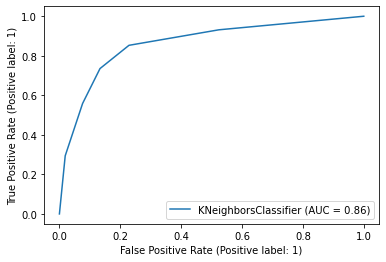

C:\Users\nishi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


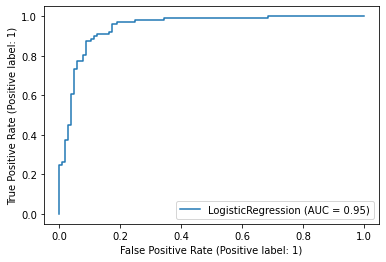

In [84]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our logistic Model so I will use this model to further evaluate probability thresholds
and corresponding performance measures.(First Pass TEST)

In [85]:
class_perf_measures(lr_model,X_test,y_test)

C:\Users\nishi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.00,102,0,105,0,0.49,1.00,0.49
1,0.10,100,72,33,2,0.75,0.98,0.83
2,0.20,97,87,18,5,0.84,0.95,0.89
3,0.30,94,87,18,8,0.84,0.92,0.87
4,0.40,93,92,13,9,0.88,0.91,0.89
5,0.50,87,96,9,15,0.91,0.85,0.88
6,0.60,79,98,7,23,0.92,0.78,0.86
7,0.70,68,100,5,34,0.93,0.67,0.81
8,0.80,51,101,4,51,0.93,0.50,0.73
9,0.90,38,103,2,64,0.95,0.37,0.68


## ***For the above performance Metrices we can interpret the following:***
>- True Positive: Loan was approved and so was it predicted too.
>- True Negative: Loan was not approvedand so was predicted.
>- False Positive: Loan was not approved but the prediction was that the loan was approved.
>- False Negative: Loan was approved but the prediction says it was not approved.<br>

From the above, we can say that our False Negatives will have adverse effects on the business.
Since main earnings for banks comes from intrest earned on loans, we would like to reduce our false negative, in order to have more borrowers.

>- Prob Threshold = 0.2:

A positive outcome can be seen when the approval has a probability of more than 20%. 
Looking at the Confusin Matrix:

|----| 0      	|     1                 	        |
|----|-------------|-------------------------------	|
|0 | TN= 87	| FP=  18            	        |
|1 | FN= 5  | TP= 97 |
    
Our False negative is lowest with an accuracy of 89%, which will in turn benefit the business. False Positive will hamper the business since, it will approve borrowers who are not eligible for loans. Hence, selecting this probability threshold is much better.


>- Prob Threshold = 0.4:

A positive outcome can be seen when the approval has a probability of more than 40%. 
Looking at the Confusin Matrix:

|----| 0      	|     1                 	        |
|----|-------------|-------------------------------	|
|0 | TN= 92	| FP=  13            	        |
|1 | FN= 9  | TP= 93 |
    
Our False negative is much higher than at 0.2 probability threshold, this value might seem good if the accuracy at this level was also higher but inorder to choose a better prespective for the business this seems to be costly.

>- Prob Threshold = 0.6:

A threshold of 0.6 would mean that a positive outcome can only be seen when the probability of delay is more than 60%.

|----| 0      	|     1                 	        |
|----|-------------|-------------------------------	|
|0 | TN= 98	| FP=  7       	        |
|1 | FN= 23  | TP= 79 |

our Prediction errors have changed there is an increase in precision that is decrease in our false positives and a notable change in false negatives.

Since our goal was to minimize false negatives, the threshold of 0.6 does not seem ideal. 
